<a href="https://colab.research.google.com/github/DEBADAS001KERNEL/ML_AND_DEEP-LEARNING-HUB/blob/main/Simple_Rainfall_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
## Introduction to Classification Problems and Rainfall Prediction Project

Classification problems are a fundamental type of machine learning task where the goal is to assign input data points to one or more predefined categories or classes. In this project, we will be delving into the realm of rainfall prediction, where we aim to build a classifier capable of accurately predicting whether it will rain or not based on various weather-related features.

## Project Overview

Our rainfall prediction project will utilize a dataset containing historical weather data, including features such as temperature, humidity, wind speed, and atmospheric pressure. The objective is to train a classification model on this data, which can then be used to predict the likelihood of rainfall for new, unseen weather conditions.

## Benefits and Applications

Accurately predicting rainfall has numerous benefits and practical applications. It can assist farmers in making informed decisions about crop selection and irrigation schedules, enabling them to optimize their agricultural practices. Additionally, rainfall predictions are crucial for disaster management, helping authorities prepare for and mitigate the impacts of heavy rainfall events.

## Our Approach

In this project, we will explore various classification algorithms such as logistic regression, decision trees, and support vector machines to identify the most suitable model for our rainfall prediction task. We will evaluate the performance of each algorithm based on its accuracy, precision, and recall metrics.

## Conclusion

By successfully completing this project, we aim to develop a rainfall prediction model that can provide valuable insights and aid in decision-making processes related to agriculture, disaster management, and other rainfall-sensitive sectors.


SyntaxError: invalid syntax (<ipython-input-27-670fb6dd8fb1>, line 3)

In [28]:
# here im going to use this data set
"https://www.kaggle.com/datasets/sujithmandala/simple-rainfall-classification-dataset?select=rainfall.csv"

'https://www.kaggle.com/datasets/sujithmandala/simple-rainfall-classification-dataset?select=rainfall.csv'

In [29]:
# importing important modules

import pandas as pd
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  MinMaxScaler,LabelEncoder
import matplotlib.pyplot as plt



# let's see the data
data=pd.read_csv("/content/rainfall.csv")
data.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


In [30]:
# check the shape
data.shape

(54, 6)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


**We have downloaded this dataset, which is already in a clean version, making it a good candidate for building our first machine learning model. While we can perform additional Feature Engineering (FE) and Exploratory Data Analysis (EDA) to gain deeper insights and potentially improve model performance, we will focus on building a basic model first. These additional steps can be explored in future projects as we gain more experience. This approach allows us to get hands-on practice with model building without getting overwhelmed by the complexities of data analysis.**

**here we can see we have  NAN values in row no 53, lets remove the row**

In [32]:
data

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy
5,2022-01-06,15.3,16.5,75.0,7.8,Rainy
6,2022-01-07,6.8,19.2,61.0,4.5,Rainy
7,2022-01-08,0.0,21.7,48.0,2.9,Sunny
8,2022-01-09,11.2,17.3,73.0,6.1,Rainy
9,2022-01-10,18.6,15.8,79.0,8.9,Rainy


In [33]:
# so friends , i think ,we can  remove the "date" column cause it doesn't provide any predictive power for your model.

'''
SOME IMPORTANT REASONS TO REMOVE "date" COLOUMN

1. Lack of Direct Influence

The date itself does not inherently influence weather conditions like rainfall, temperature,
 humidity, or wind speed. These weather parameters are more directly influenced by atmospheric conditions rather
 than the specific date.

2. Temporal Patterns Not Captured

Weather conditions do have seasonal patterns, but these patterns are better captured by features derived from the date,
 such as the month or season. The raw date column does not explicitly convey this information.

3. Irrelevant Information

The date is simply a timestamp and does not contain meaningful information about the weather.
It acts more as an identifier rather than a feature with predictive power.

4. Feature Engineering
Relevant temporal patterns should be captured through feature engineering.
 For instance, extracting the month or season from the date could help capture seasonal variations in weather, but
 using the raw date as is won't contribute to the model's performance.

5. Overfitting Risk

Including the date column as a feature might lead to overfitting, where the model learns
the noise in the training data rather than the underlying pattern.
 This reduces the model's ability to generalize to new data.

6. High Cardinality
Dates have high cardinality (many unique values) which can complicate the
model without adding value. Most machine learning models do
not handle high cardinality
features well without appropriate transformation.


'''
data.drop('date', axis=1, inplace=True)

In [34]:
data.shape

(54, 5)

In [45]:
print("\nChecking for NaN values:")
print(data.isna())

# Remove rows with NaN values
data = data.dropna()

print("\nDataFrame after removing rows with NaN values:")
print(data)


Checking for NaN values:
    rainfall  temperature  humidity  wind_speed  weather_condition
0      False        False     False       False              False
1      False        False     False       False              False
2      False        False     False       False              False
3      False        False     False       False              False
4      False        False     False       False              False
5      False        False     False       False              False
6      False        False     False       False              False
7      False        False     False       False              False
8      False        False     False       False              False
9      False        False     False       False              False
10     False        False     False       False              False
11     False        False     False       False              False
12     False        False     False       False              False
13     False        False     False 

In [46]:

label_encoder = LabelEncoder()

data['weather_condition'] = label_encoder.fit_transform(data['weather_condition'])


<ipython-input-46-f406a62a357d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weather_condition'] = label_encoder.fit_transform(data['weather_condition'])


In [47]:
data.head()

,rainfall,temperature,humidity,wind_speed,weather_condition
0,12.5,15.2,78.0,8.5,0
1,8.2,17.8,65.0,5.2,0
2,0.0,20.1,52.0,3.1,1
3,3.7,18.6,71.0,6.7,0
4,21.1,14.8,82.0,9.3,0


In [48]:
data.shape

(53, 5)

In [49]:
print("\nChecking for NaN values:")
print(data.isna())

# Remove rows with NaN values
cleaned_data = data.dropna()

print("\nDataFrame after removing rows with NaN values:")
print(cleaned_data)


Checking for NaN values:
    rainfall  temperature  humidity  wind_speed  weather_condition
0      False        False     False       False              False
1      False        False     False       False              False
2      False        False     False       False              False
3      False        False     False       False              False
4      False        False     False       False              False
5      False        False     False       False              False
6      False        False     False       False              False
7      False        False     False       False              False
8      False        False     False       False              False
9      False        False     False       False              False
10     False        False     False       False              False
11     False        False     False       False              False
12     False        False     False       False              False
13     False        False     False 

In [50]:
from sklearn.compose import make_column_transformer


# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["rainfall", "temperature", "humidity","wind_speed"]), # get all values between 0 and 1

)



In [55]:
# Create X & y
x = data.drop("weather_condition", axis=1)
y = data["weather_condition"]

from sklearn.model_selection import train_test_split
# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [40]:
X_train_normal

array([[0.51376147, 0.35789474, 0.6744186 , 0.48648649],
       [0.        , 0.94736842, 0.06976744, 0.        ],
       [0.31192661, 0.55789474, 0.39534884, 0.27027027],
       [0.82110092, 0.29473684, 0.76744186, 0.5       ],
       [0.96788991, 0.09473684, 0.88372093, 0.91891892],
       [0.26605505, 0.41052632, 0.65116279, 0.59459459],
       [0.8440367 , 0.33684211, 0.74418605, 0.58108108],
       [0.38073394, 0.55789474, 0.55813953, 0.48648649],
       [0.41743119, 0.15789474, 0.86046512, 0.86486486],
       [0.44036697, 0.49473684, 0.62790698, 0.56756757],
       [0.88073394, 0.30526316, 0.76744186, 0.63513514],
       [0.85321101, 0.2       , 0.81395349, 0.86486486],
       [0.25688073, 0.48421053, 0.44186047, 0.32432432],
       [0.53211009, 0.54736842, 0.48837209, 0.35135135],
       [0.        , 0.86315789, 0.11627907, 0.02702703],
       [0.44954128, 0.61052632, 0.41860465, 0.2972973 ],
       [0.09633028, 0.62105263, 0.3255814 , 0.13513514],
       [0.5733945 , 0.13684211,

In [52]:
y

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
41    1
42    0
43    0
44    0
45    0
46    1
47    0
48    0
49    0
50    0
51    1
52    0
Name: weather_condition, dtype: int64

In [65]:
# buield the model

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),

    tf.keras.layers.Dense(1,activation="sigmoid"),
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

hist=model_1.fit(x_train_normal,y_train,epochs=200,validation_data=(x_test_normal,y_test))

Epoch 1/200
2/2 [==============================] - 3s 697ms/step - loss: 0.6785 - accuracy: 0.8095 - val_loss: 0.6567 - val_accuracy: 0.7273
Epoch 2/200
2/2 [==============================] - 0s 115ms/step - loss: 0.6576 - accuracy: 0.8095 - val_loss: 0.6327 - val_accuracy: 0.7273
Epoch 3/200
2/2 [==============================] - 0s 127ms/step - loss: 0.6379 - accuracy: 0.8095 - val_loss: 0.6079 - val_accuracy: 0.8182
Epoch 4/200
2/2 [==============================] - 0s 127ms/step - loss: 0.6181 - accuracy: 0.8333 - val_loss: 0.5842 - val_accuracy: 1.0000
Epoch 5/200
2/2 [==============================] - 0s 158ms/step - loss: 0.5964 - accuracy: 0.9048 - val_loss: 0.5585 - val_accuracy: 1.0000
Epoch 6/200
2/2 [==============================] - 0s 176ms/step - loss: 0.5759 - accuracy: 0.9524 - val_loss: 0.5337 - val_accuracy: 1.0000
Epoch 7/200
2/2 [==============================] - 0s 189ms/step - loss: 0.5538 - accuracy: 0.9762 - val_loss: 0.5104 - val_accuracy: 1.0000
Epoch 8/200
2

In [66]:
model_1.evaluate(x_test_normal,y_test)

1/1 [==============================] - 0s 52ms/step - loss: 0.0042 - accuracy: 1.0000


[0.004221708048135042, 1.0]

<Axes: >

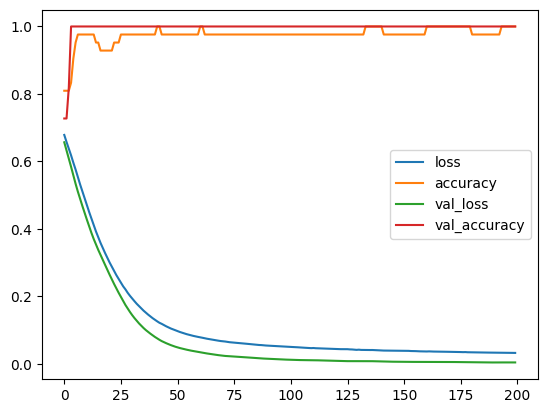

In [67]:
import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot()

In [69]:
loss, accuracy = model_1.evaluate(x_test_normal, y_test, verbose=0)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 1.0000


In [68]:
y_pred=model_1.predict(x_test_normal)

1/1 [==============================] - 0s 151ms/step


In [80]:
from sklearn.metrics import accuracy_score


# Evaluate the model on the test data
y_test_pred = model_1.predict(x_test_normal)
y_test_pred_classes = (y_test_pred > 0.5).astype(int)

# Calculate the accuracy score
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 [==============================] - 0s 21ms/step
Test Accuracy: 1.0000


In [81]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
precision = precision_score(y_test, y_test_pred_classes)
recall = recall_score(y_test, y_test_pred_classes)
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')


Test Precision: 1.0000
Test Recall: 1.0000


In [ ]:
# as we can see our model is working perfectly.